In [1]:
# tensorflow 설치
!pip install --upgrade tensorflow

In [2]:
# 필요한 모듈설치
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_boston
%matplotlib inline

In [3]:
# boston 데이타셋 불러오기 : dictionary구조를 DataFrame 변환 
boston=load_boston()
boston

C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
bost= pd.DataFrame(boston.data , columns= boston.feature_names)
bost

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
# boston dataset의 target array는 주택 가격임. 이를 medv 컬럼으로 DataFrame에 추가함. 
bost['medv'] = boston.target
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
## 표준화 후 훈령용, 테스트용 자료 분류 : fixed
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
y_target= bost['medv']
x_data = bost.drop(['medv'],axis=1,inplace=False)

In [7]:
# 표준화(Z)
x_data = StandardScaler().fit_transform(x_data) # x_data객체에 표준화한 데이터를 저장

In [8]:
num_of_train = int(len(x_data) * 0.8) # 데이터의 전체 길이의 80%에 해당하는 길이값을 구한다.
num_of_test = int(len(x_data) - num_of_train) # 전체 길이에서 80%에 해당하는 길이를 뺀다.
print('훈련 데이터의 크기 :',num_of_train)
print('테스트 데이터의 크기 :',num_of_test)

훈련 데이터의 크기 : 404
테스트 데이터의 크기 : 102


In [9]:
x_test = x_data[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y_target[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
x_train = x_data[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y_target[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장

In [10]:
print('X 테스트 데이터 :')
print(x_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
[[ 4.41236983 -0.48772236  1.01599907 ...  0.80657583 -0.2983844
   2.06433044]
 [ 7.48364564 -0.48772236  1.01599907 ...  0.80657583  0.31024714
   1.4475658 ]
 [ 1.99029374 -0.48772236  1.01599907 ...  0.80657583  0.14852285
   1.49802836]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]
y 테스트 데이터 :
[8.5, 5.0, 11.9, 27.9, 17.2, 27.5, 15.0, 17.2, 17.9, 16.3, 7.0, 7.2, 7.5, 10.4, 8.8, 8.4, 16.7, 14.2, 20.8, 13.4, 11.7, 8.3, 10.2, 10.9, 11.0, 9.5, 14.5, 14.1, 16.1, 14.3, 11.7, 13.4, 9.6, 8.7, 8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8, 14.9, 12.6, 14.1, 13.0, 13.4, 15.2, 16.1, 17.8, 14.9, 14.1, 12.7, 13.5, 14.9, 20.0, 16.4, 17.7, 19.5, 20.2, 21.4, 19.9, 19.0, 19.1, 19.1, 20.1, 19.9, 19.6, 23.2, 29.8, 13.8, 13.3, 16.7, 12.0, 14.6, 21.4, 23.0, 23.7, 25.0, 21.8, 20.6, 21.2, 19.1,

In [11]:
# Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 52)                728       
                                                                 
 dense_1 (Dense)             (None, 39)                2067      
                                                                 
 dense_2 (Dense)             (None, 26)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 회귀 모델 학습 : epochs~신경망을 전체 한번 학습하여 나온 결과
# batch_size~train-set의 80%의 자료를 40개씩 소그룹(sub-group) 10개로 나누어 빠르게 학습
history = model.fit(x_train, y_train, epochs=100, batch_size=40, validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 1s 46ms/step - loss: 724.1619 - val_loss: 476.9442
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 711.8393 - val_loss: 467.0819
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 699.6324 - val_loss: 454.9681
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 681.1693 - val_loss: 438.7625
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 653.5323 - val_loss: 415.7303
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 610.5284 - val_loss: 383.0520
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 544.0511 - val_loss: 338.2750
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 446.1647 - val_loss: 281.7770
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 324.2706 - val_loss: 221.1586
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 188.3266 - val_los

Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 5.2209 - val_loss: 88.1554
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 5.1821 - val_loss: 87.8066
Epoch 85/100
9/9 [==============================] - 0s 5ms/step - loss: 5.1705 - val_loss: 86.3771
Epoch 86/100
9/9 [==============================] - 0s 5ms/step - loss: 5.1664 - val_loss: 84.7146
Epoch 87/100
9/9 [==============================] - 0s 5ms/step - loss: 5.1261 - val_loss: 86.7774
Epoch 88/100
9/9 [==============================] - 0s 5ms/step - loss: 5.1352 - val_loss: 85.9764
Epoch 89/100
9/9 [==============================] - 0s 4ms/step - loss: 5.0069 - val_loss: 87.0269
Epoch 90/100
9/9 [==============================] - 0s 6ms/step - loss: 5.0220 - val_loss: 87.4089
Epoch 91/100
9/9 [==============================] - 0s 5ms/step - loss: 5.1254 - val_loss: 86.8195
Epoch 92/100
9/9 [==============================] - 0s 4ms/step - loss: 4.9387 - val_loss: 85.6292
Epoch 93/1

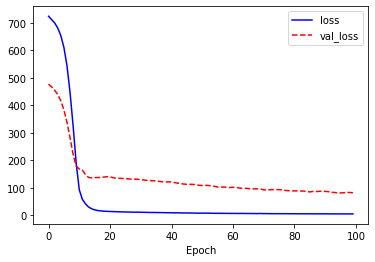

In [14]:
# 회귀 모델 학습 결과 시각화 : loss=mse(훈련용), val_loss(검증용)   
# loss가 잘 줄지 않으면 활성함수를 바꿔본다
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
# 회귀 모델 평가
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 36.3403


36.34031295776367

In [19]:
# 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

In [23]:
# 회귀 모델 평가
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))

4/4 [==============================] - 0s 2ms/step
MSE : 36.340 , RMSE : 6.028
